Detected car with confidence 0.978 at location [284.9, 210.98, 465.1, 352.76]
Detected person with confidence 0.992 at location [157.18, 137.92, 304.75, 394.28]
Detected bicycle with confidence 0.947 at location [195.74, 304.46, 262.0, 446.29]
Detected bicycle with confidence 0.916 at location [186.37, 233.45, 278.18, 445.17]
Detected car with confidence 0.972 at location [0.22, 153.14, 96.63, 356.35]
Detected car with confidence 0.959 at location [423.96, 224.72, 470.07, 263.04]
Detected car with confidence 0.962 at location [756.44, 197.18, 871.81, 345.25]


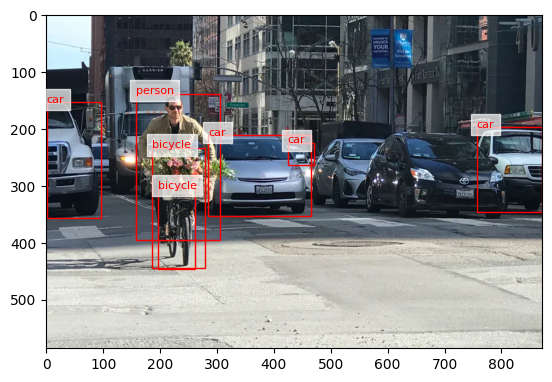

In [2]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

url = "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EYFejGUjvjPcc4PZTwoufw.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


# print results
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )
    
labels = results["labels"]
boxes = results["boxes"]

image_np = image.convert("RGB")
# image_np = torch.Tensor(np.array(image_np))

fig, ax = plt.subplots()

for label, box in zip(labels, boxes):
    label_name = model.config.id2label[label.item()]
    box = box.tolist()

    # Draw the bounding box rectangle
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add label text near the bounding box
    ax.text(box[0], box[1], label_name, color='r', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

ax.imshow(image_np)